In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def show(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [3]:
img = cv.imread('images.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)

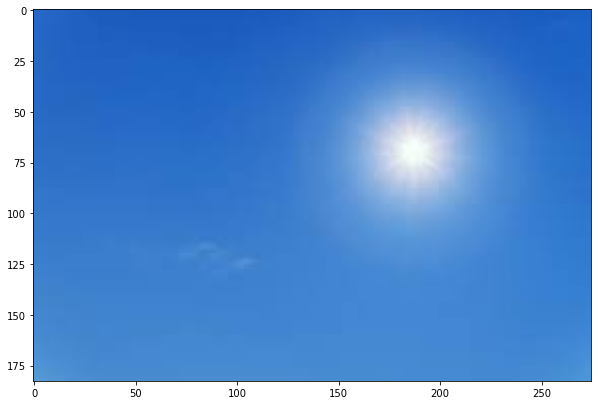

In [4]:
show(img)

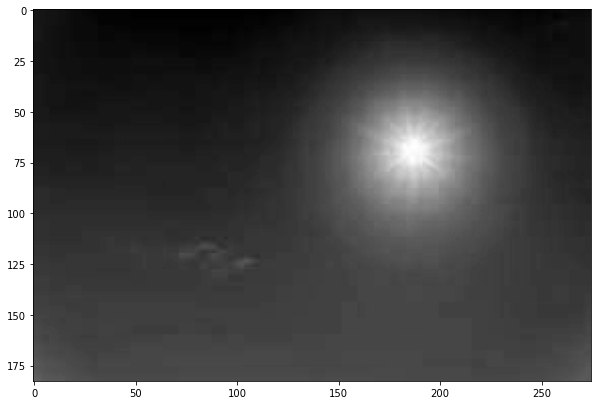

In [5]:
sunImg = img.copy()
sunImg = cv.cvtColor(sunImg,cv.COLOR_BGR2GRAY)
show(sunImg,'gray')

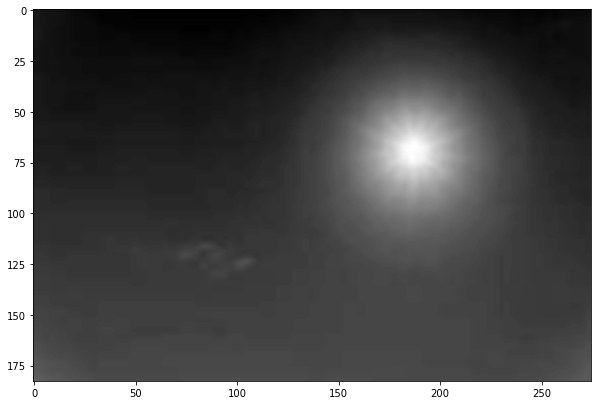

In [6]:
blur_sun = cv.GaussianBlur(sunImg,(5,5),0)
show(blur_sun,'gray')

In [7]:
blur_sun.min()

112

In [8]:
ret,thresh = cv.threshold(blur_sun,122,55,cv.THRESH_TRIANGLE)

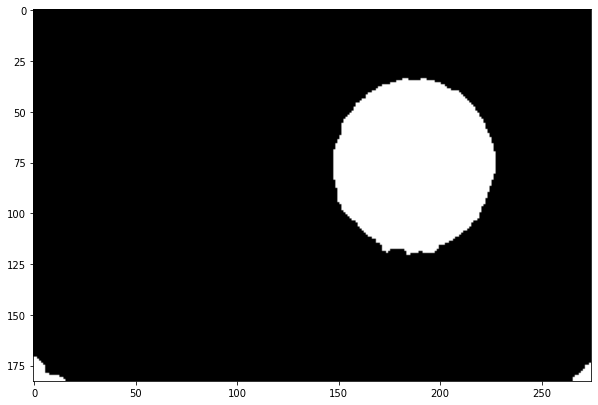

In [9]:
show(thresh,'gray')

In [10]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

In [11]:
sure_bg = cv.dilate(opening,kernel,iterations=3)

In [12]:
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)

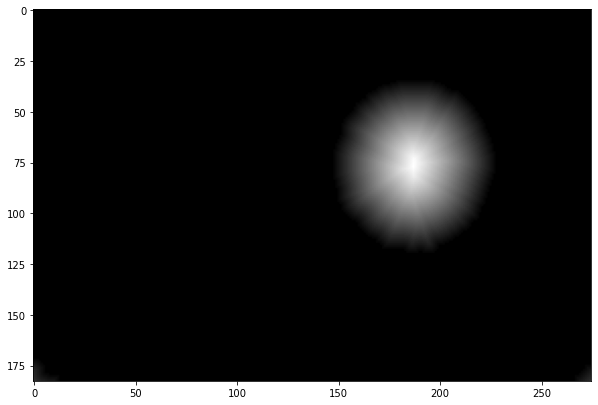

In [13]:
show(dist_transform,'gray')

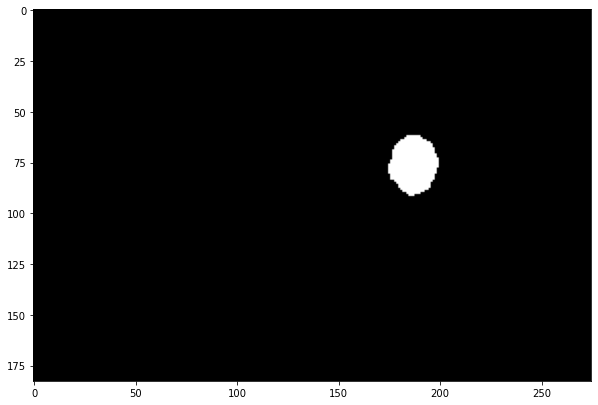

In [14]:
show(sure_fg,'gray')

In [15]:
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

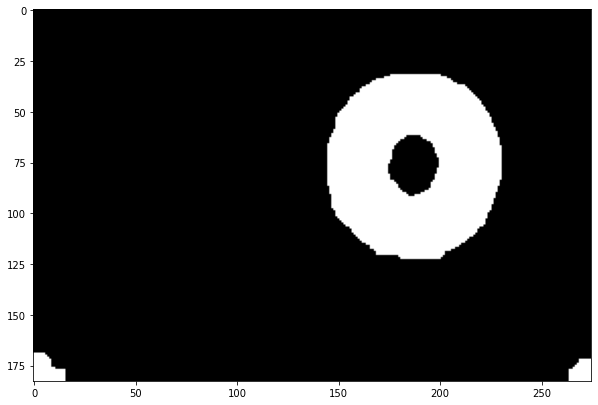

In [16]:
show(unknown,'gray')

In [17]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [18]:
markers = cv.watershed(img,markers)

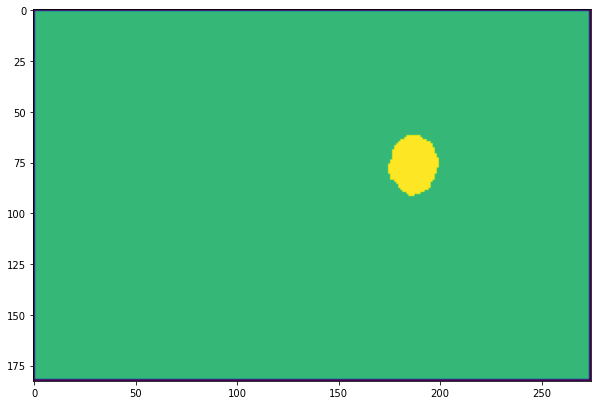

In [19]:
show(markers)

In [22]:
contours, hierarchy = cv.findContours(markers.copy(), cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv.drawContours(img, contours, i, (255, 0, 0), 1)

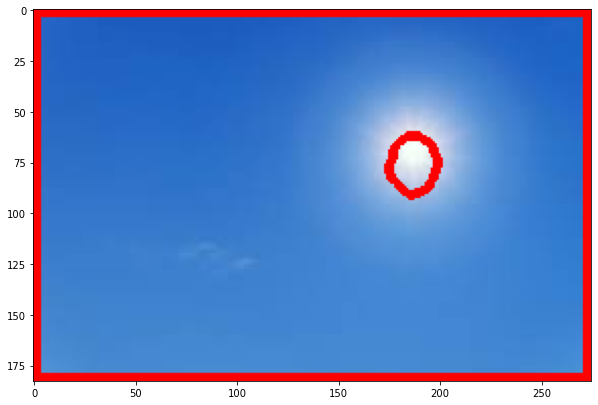

In [23]:
show(img)